In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/Othercomputers/My MacBook Pro/highway-env-tibi')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install gym==0.24.1
!pip install pygame

import os
os.environ['SDL_VIDEODRIVER']='dummy'
import pygame
pygame.display.set_mode((400, 300))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Surface(400x300x32 SW)>

In [1]:
!pip install gym==0.24.1
!pip install highway-env

You should consider upgrading via the '/Users/mario/.pyenv/versions/3.9.6/bin/python3.9 -m pip install --upgrade pip' command.
     |████████████████████████████████| 103 kB 2.1 MB/s eta 0:00:01
You should consider upgrading via the '/Users/mario/.pyenv/versions/3.9.6/bin/python3.9 -m pip install --upgrade pip' command.


/Users/mario/Individual Code/highway-env-tibi/highway_env/vehicle/objects.py:33: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.position = np.array(position, dtype=np.float)
/Users/mario/Individual Code/highway-env-tibi/highway_env/vehicle/controller.py:273: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more de

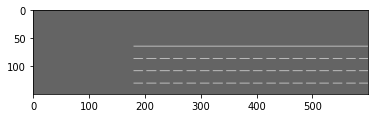

: 

In [2]:
import gym
import highway_env
from matplotlib import pyplot as plt
%matplotlib inline

env = gym.make('highway-v0')
env.reset()
for _ in range(3):
    action = env.action_type.actions_indexes["IDLE"]
    obs, reward, done, info = env.step(action)
    env.render()

plt.imshow(env.render(mode="rgb_array"))
plt.show()

/content/drive/Othercomputers/My MacBook Pro/highway-env-tibi/highway_env/vehicle/objects.py:33: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.position = np.array(position, dtype=np.float)
/content/drive/Othercomputers/My MacBook Pro/highway-env-tibi/highway_env/vehicle/controller.py:273: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depre

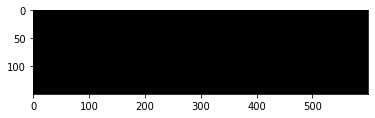

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

env.config["lanes_count"] = 2
env.reset()
plt.imshow(env.render(mode="rgb_array"))
plt.show()

In [ ]:
from stable_baselines3 import DQN

model = DQN('MlpPolicy', env,
              policy_kwargs=dict(net_arch=[256, 256]),
              learning_rate=5e-4,
              buffer_size=15000,
              learning_starts=200,
              batch_size=32,
              gamma=0.8,
              train_freq=1,
              gradient_steps=1,
              target_update_interval=50,
              verbose=1,
              tensorboard_log="highway_dqn/")
model.learn(int(2e4))
model.save("highway_dqn/model")

# Load and test saved model
model = DQN.load("highway_dqn/model")
while True:
  done = False
  obs = env.reset()
  while not done:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to highway_dqn/DQN_1
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 36.5     |
|    ep_rew_mean      | 17.6     |
|    exploration_rate | 0.931    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 34       |
|    time_elapsed     | 4        |
|    total_timesteps  | 146      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.2     |
|    ep_rew_mean      | 25.1     |
|    exploration_rate | 0.855    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 41       |
|    time_elapsed     | 7        |
|    total_timesteps  | 306      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0609   |
|    n_updates        | 105      |
--

In [ ]:
# Load and test saved model
model = DQN.load("highway_dqn/model")
while True:
  done = False
  obs = env.reset()
  while not done:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()